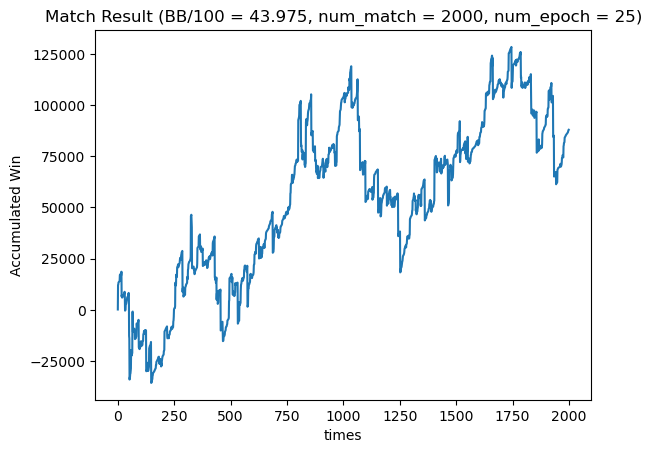

In [15]:
import matplotlib.pyplot as plt

file_path = '../assets/slumbot/record.txt'

xs, ys = [], []
with open(file_path, "r") as file:
	for idx, line in enumerate(file): 
		xs.append(idx)
		ys.append(int(line.split(' ')[14][:-1]))

bb_100 = ys[-1] / 100 / len(ys) * 100

plt.title(f'Match Result (BB/100 = {round(bb_100, 3)}, num_match = {len(xs)}, num_epoch = {25})')
plt.plot(xs, ys)
plt.xlabel('times')
plt.ylabel('Accumulated Win')
plt.show()

In [16]:
import ast

total_data = []
for i in range(2):
	file_path = f'../assets/slumbot/backup/mixed/record-500-{i+5}.txt'
	with open(file_path, "r") as file:
		for idx, line in enumerate(file):
			hand_data = {} 
			cols = line.split(",")
			hand_data['id'] = ast.literal_eval(cols[0][5:])
			hand_data['is_first'] = ast.literal_eval(cols[1][12:])
			hand_data['hand_win'] = ast.literal_eval(cols[2][12:])
			hand_data['total_win'] = ast.literal_eval(cols[3][13:])
			hand_data['history_action'] = cols[4][18:]
			hand_data['hole_cards'] = ast.literal_eval((','.join(cols[5:7]))[14:])
			hand_data['bot_hole_cards'] = ast.literal_eval((','.join(cols[7:9]))[18:])
			hand_data['board_cards'] = ast.literal_eval((','.join(cols[9:]))[15:])
			total_data.append(hand_data)
		file.close()
len(total_data)

FileNotFoundError: [Errno 2] No such file or directory: '../assets/slumbot/backup/mixed/record-500-5.txt'

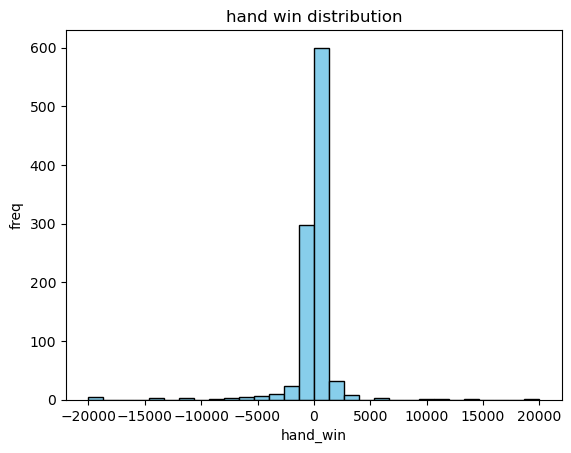

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 hand_win_values 是从 total_data 中提取的 hand_win 列表
hand_win_values = [hand_data['hand_win'] for hand_data in total_data]

# 设置区间（bins），这里划分为 10 个区间
num_bins = 30
min_value = min(hand_win_values)
max_value = max(hand_win_values)
bins = np.linspace(min_value, max_value, num_bins + 1)  # 区间边界

# 统计每个区间的频次
hist, bin_edges = np.histogram(hand_win_values, bins=bins)

# 绘制柱状图
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align='edge', color='skyblue', edgecolor='black')
plt.xlabel('hand_win')
plt.ylabel('freq')
plt.title('hand win distribution')
plt.show()

In [ ]:
critical_cases = [hand_data for hand_data in total_data if abs(hand_data['hand_win']) > 10000]
critical_cases_sorted = sorted(critical_cases, key=lambda hand_data: abs(hand_data['hand_win']), reverse=True)
for case in critical_cases_sorted:
    print(case)

{'id': 261, 'is_first': True, 'hand_win': -20000, 'total_win': -27500, 'history_action': 'b200b600b1200b5400c/kb5400b14600c//', 'hole_cards': ['6s', '6c'], 'bot_hole_cards': ['Ac', '7c'], 'board_cards': ['Jc', '5h', '5c', 'Kd', '7s']}
{'id': 424, 'is_first': False, 'hand_win': 20000, 'total_win': 10300, 'history_action': 'b200b400b1800b3600b20000c///', 'hole_cards': ['Td', '9s'], 'bot_hole_cards': ['Ah', 'Kh'], 'board_cards': ['Qh', 'Js', '2h', '2d', 'Kd']}
{'id': 308, 'is_first': False, 'hand_win': -20000, 'total_win': 8150, 'history_action': 'b200c/b200b600b1200b7000b14000b19800c//', 'hole_cards': ['Th', '7c'], 'bot_hole_cards': ['5d', '5c'], 'board_cards': ['Ks', '8h', '5h', 'Ah', 'Td']}
{'id': 441, 'is_first': True, 'hand_win': -20000, 'total_win': -16150, 'history_action': 'cb300c/b300b600b2400c/b5400c/b11900c', 'hole_cards': ['6s', '5s'], 'bot_hole_cards': ['Ad', 'Qh'], 'board_cards': ['Qc', 'Jc', '6h', 'As', '3s']}
{'id': 462, 'is_first': False, 'hand_win': -20000, 'total_win': 

In [ ]:
import pickle

dbs = []
NUMS = [96525, 45540, 990]

for i in range(3):
	with open(f'../assets/db/db{i+5}.pkl', 'rb') as fp:
		dbs.append(pickle.load(fp))

len(dbs)

3

In [ ]:
side = 'model' # or slumbot
cnts = [0 for i in range(8)]
for hand_data in total_data:
    cards = []
    if side == 'model':
        cards = hand_data['hole_cards'] + hand_data['board_cards']
    elif side == 'slumbot':
        cards = hand_data['bot_hole_cards'] + hand_data['board_cards']
    cnts[len(cards)] += 1
cnts
              

[0, 0, 237, 0, 0, 196, 82, 485]

In [ ]:
import numpy as np

b2_result = np.array([4.3, -15.4, -103.89, 66.5])
b4_result = np.array([2.8, -0.5, -36.0, 17.4])

print(f"B2 Model: avg = {np.average(b2_result)}, std = {np.std(b2_result)}")
print(f"B4 Model: avg = {np.average(b4_result)}, std = {np.std(b4_result)}")

B2 Model: avg = -12.122500000000002, std = 60.99838537822128
B4 Model: avg = -4.075000000000001, std = 19.62414010854998
